### Problem Statement: Credit Risk Scoring

In [186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Data Ingestion and Preparation

In [187]:
df = pd.read_csv('CreditScoring.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [188]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [189]:
df.columns

Index(['Status', 'Seniority', 'Home', 'Time', 'Age', 'Marital', 'Records',
       'Job', 'Expenses', 'Income', 'Assets', 'Debt', 'Amount', 'Price'],
      dtype='object')

In [201]:
# null and duplicated values
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [202]:
df.duplicated().sum()

2

In [192]:
df.columns = df.columns.str.lower()
df.columns

Index(['status', 'seniority', 'home', 'time', 'age', 'marital', 'records',
       'job', 'expenses', 'income', 'assets', 'debt', 'amount', 'price'],
      dtype='object')

In [193]:
#turning integer values of certain Series into strings
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [194]:
status = {
    0: 'unknown',
    1: 'ok',
    2: 'default'   
}
df.status = df.status.map(status)

In [195]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [196]:
df.status.value_counts()

ok         3200
default    1254
unknown       1
Name: status, dtype: int64

In [197]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.job = df.job.map(job_values)

In [198]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [199]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,7.987205e+00,8.173444e+00,0.0,2.0,5.0,12.0,48.0
time,4455.0,4.644175e+01,1.465523e+01,6.0,36.0,48.0,60.0,72.0
age,4455.0,3.707767e+01,1.098486e+01,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,5.556880e+01,1.951588e+01,35.0,35.0,51.0,72.0,180.0
income,4455.0,7.633170e+05,8.703625e+06,0.0,80.0,120.0,166.0,99999999.0
assets,4455.0,1.060341e+06,1.021757e+07,0.0,0.0,3500.0,6000.0,99999999.0
debt,4455.0,4.043820e+05,6.344253e+06,0.0,0.0,0.0,0.0,99999999.0
amount,4455.0,1.039022e+03,4.745430e+02,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1.462876e+03,6.280899e+02,105.0,1117.5,1400.0,1692.0,11140.0


In [110]:
#replace all the '999999' values with nan
for c in ['income','assets', 'debt']:
    df[c] = df[c].replace(to_replace = 99999999.0, value= np.nan)

In [111]:
df.describe()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.000000,4455.000000,4455.000000,4455.000000,4421.000000,4408.000000,4437.000000,4455.000000,4455.000000
mean,7.987205,46.441751,37.077666,55.568799,130.568197,5403.433984,342.948614,1039.021773,1462.875645
std,8.173444,14.655225,10.984856,19.515878,86.367434,11573.161523,1245.861736,474.543007,628.089913
min,0.000000,6.000000,18.000000,35.000000,0.000000,0.000000,0.000000,100.000000,105.000000
25%,2.000000,36.000000,28.000000,35.000000,80.000000,0.000000,0.000000,700.000000,1117.500000
50%,5.000000,48.000000,36.000000,51.000000,120.000000,3000.000000,0.000000,1000.000000,1400.000000
75%,12.000000,60.000000,45.000000,72.000000,165.000000,6000.000000,0.000000,1300.000000,1692.000000
max,48.000000,72.000000,68.000000,180.000000,959.000000,300000.000000,30000.000000,5000.000000,11140.000000


In [112]:
#replace the unkown value from df.status
df = df[df.status != 'unkown'].reset_index(drop=True)

In [113]:
# split dataset into train and test
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size = 0.2, random_state = 11)
df_train, df_val = train_test_split(df_full_train, test_size= 0.25, random_state = 11)

len(df), len(df_train)  + len(df_val) + len(df_test)

(4455, 4455)

In [114]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [115]:
#turn the status series values back to int
y_train = (df_train.status == 'default').astype(int).values
y_val = (df_val.status == 'default').astype(int).values
y_test = (df_test.status == 'default').astype(int).values

In [116]:
#remove the series status from each split datasets
del(df_train['status'])
del(df_val['status'])
del(df_test['status'])

### Decision Tree 
##### Decision trees are a non-parametric supervised learning method used for both classification and regression tasks.
##### They use a decision tree to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.
##### When the target tree has discrete in value (0 or 1), it is a classification tree.
##### When the target tree has continous value, it is a regession tree.

In [117]:
# function to asses risk
def assess_risk(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [118]:
client = df_train.iloc[0].to_dict()
client

{'seniority': 3,
 'home': 'rent',
 'time': 36,
 'age': 61,
 'marital': 'married',
 'records': 'no',
 'job': 'fixed',
 'expenses': 41,
 'income': 57.0,
 'assets': 12000.0,
 'debt': 0.0,
 'amount': 2500,
 'price': 3559}

In [119]:
assess_risk(client)

'ok'

In [120]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer

In [203]:
#fill the na values
df_train.fillna(0)

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,3,rent,36,61,married,no,fixed,41,57.0,12000.0,0.0,2500,3559
1,5,rent,48,30,separated,yes,partime,39,41.0,0.0,0.0,1300,1600
2,15,owner,60,32,divorced,no,freelance,35,0.0,6000.0,3300.0,1550,1612
3,2,rent,12,47,married,yes,fixed,103,426.0,0.0,0.0,350,450
4,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2668,1,parents,60,21,single,no,partime,35,45.0,0.0,0.0,400,904
2669,5,rent,60,47,single,yes,fixed,46,106.0,8500.0,0.0,2500,2664
2670,23,rent,24,47,single,no,fixed,44,86.0,0.0,0.0,350,975
2671,5,owner,60,58,married,no,freelance,45,93.0,45000.0,0.0,1500,2090


In [235]:
dv = DictVectorizer(sparse=False)

In [237]:
train_dicts = df_train.fillna(0).to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [238]:
dt = DecisionTreeClassifier()

In [239]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [240]:
#test the model with validation datasets, fill the na values of df_val
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [241]:
y_pred = dt.predict_proba(X_val)[:,1]

In [242]:
#check the roc_auc_score of the model
from sklearn.metrics import roc_auc_score

In [243]:
roc_auc_score(y_val, y_pred)

0.6625236405888825

In [244]:
y_pred_t = dt.predict_proba(X_train)[:,1]
roc_auc_score(y_train,y_pred_t)

1.0

##### The model performs bad with the validation dataset but good with the training dataset because of overfittin
##### To correct this we have to limit the depth of the decision tree

In [245]:
dt = DecisionTreeClassifier(max_depth=3)

In [246]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [247]:
y_pred = dt.predict_proba(X_val)[:,1]

In [248]:
y_pred_t = dt.predict_proba(X_train)[:,1]

In [217]:
score_train = roc_auc_score(y_train, y_pred_t)
print("Train pred: ", score_train)
score_val = roc_auc_score(y_val, y_pred)
print("Val pred: ", score_val)

Train pred:  0.7654807474207559
Val pred:  0.763427236430611


In [218]:
#visualising the decision tree
from sklearn.tree import export_text

In [219]:
print(export_text(dt,feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- income <= 50.50
|   |   |   |--- class: 1
|   |   |--- income >  50.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 99.50
|   |   |   |--- class: 1
|   |   |--- income >  99.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 73.50
|   |   |   |--- class: 0
|   |   |--- income >  73.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- time <= 27.00
|   |   |   |--- class: 0
|   |   |--- time >  27.00
|   |   |   |--- class: 1



### Decision Tree Learning Algorithm
##### 1. Find the best split
##### 2. Stop if max-depth is reached
##### 3. If Left leaf is sufficiently large and not pure yet
#####           Repeat step 1 and 2 for LEFT 
##### 4. If right leaf is sufficiently large and not pure yet
#####         Repeat step 1 and 2 for right

###### Misclassification rate for different Treshold values
###### And Decisiont Impurity Rate

In [220]:
data = [
    [8000,'default'],
    [2000, 'default'],
    [0, 'default'],
    [5000, 'ok'],
    [5000, 'ok'],
    [4000,'ok'],
    [9000, 'ok'],
    [3000, 'default'],
]
df_example = pd.DataFrame(data, columns=['assets','status'])
df_example

,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


In [221]:
df_example.sort_values('assets')

,assets,status
2,0,default
1,2000,default
7,3000,default
5,4000,ok
3,5000,ok
4,5000,ok
0,8000,default
6,9000,ok


In [222]:
#choose the best Threshold T: T has to be within range of assets 0 and 9000 (9000 excluded) 
#we split the df_example into two (left and right)
from IPython.display import display

for T in [0,2000, 3000, 4000, 5000, 8000]:
    
    print(T)
    df_left = df_example[df_example.assets <= T]
    df_right = df_example[df_example.assets > T]
    
    display(df_left)
    print("Decision Impurity Rate Left")
    print(df_left.status.value_counts(normalize=True))
    display(df_right)
    print("Decision Impurity Rate Right")
    print(df_right.status.value_counts(normalize=True))
    print(T)
    print()

0


,assets,status
2,0,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
1,2000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


Decision Impurity Rate Right
ok         0.571429
default    0.428571
Name: status, dtype: float64
0

2000


,assets,status
1,2000,default
2,0,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok
7,3000,default


Decision Impurity Rate Right
ok         0.666667
default    0.333333
Name: status, dtype: float64
2000

3000


,assets,status
1,2000,default
2,0,default
7,3000,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
5,4000,ok
6,9000,ok


Decision Impurity Rate Right
ok         0.8
default    0.2
Name: status, dtype: float64
3000

4000


,assets,status
1,2000,default
2,0,default
5,4000,ok
7,3000,default


Decision Impurity Rate Left
default    0.75
ok         0.25
Name: status, dtype: float64


,assets,status
0,8000,default
3,5000,ok
4,5000,ok
6,9000,ok


Decision Impurity Rate Right
ok         0.75
default    0.25
Name: status, dtype: float64
4000

5000


,assets,status
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


Decision Impurity Rate Left
default    0.5
ok         0.5
Name: status, dtype: float64


,assets,status
0,8000,default
6,9000,ok


Decision Impurity Rate Right
default    0.5
ok         0.5
Name: status, dtype: float64
5000

8000


,assets,status
0,8000,default
1,2000,default
2,0,default
3,5000,ok
4,5000,ok
5,4000,ok
7,3000,default


Decision Impurity Rate Left
default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,status
6,9000,ok


Decision Impurity Rate Right
ok    1.0
Name: status, dtype: float64
8000



In [223]:
#Using multiple features 
data = [
    [8000,3000,'default'],
    [2000,1000,'default'],
    [0,1000,'default'],
    [5000,1000 ,'ok'],
    [5000,1000 ,'ok'],
    [4000,1000,'ok'],
    [9000,500,'ok'],
    [3000,1000,'default'],
]
df_example = pd.DataFrame(data, columns=['assets','debt','status'])
df_example

,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


In [224]:
#sort by debt
df_example.sort_values('debt')

,assets,debt,status
6,9000,500,ok
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,1000,default
0,8000,3000,default


In [225]:
thresholds = {
    'assets': [0,2000, 3000, 4000, 5000, 8000],
    'debt': [0,500,1000, 2000]
}

In [226]:
#choose the best Threshold T: T has to be within range of assets 0 and 9000 (9000 excluded) 
#we split the df_example into two (left and right)
from IPython.display import display

for feature, Ts in thresholds.items():
    print('################')
    print()
    print(f'For feature:{feature}')
    for T in Ts:
    
        print(T)
        df_left = df_example[df_example[feature] <= T]
        df_right = df_example[df_example[feature] > T]

        display(df_left)
        print("Decision Impurity Rate Left")
        print(df_left.status.value_counts(normalize=True))
        display(df_right)
        print("Decision Impurity Rate Right")
        print(df_right.status.value_counts(normalize=True))
        print(T)
        print()
    print('################')

################

For feature:assets
0


,assets,debt,status
2,0,1000,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


Decision Impurity Rate Right
ok         0.571429
default    0.428571
Name: status, dtype: float64
0

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


Decision Impurity Rate Right
ok         0.666667
default    0.333333
Name: status, dtype: float64
2000

3000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
7,3000,1000,default


Decision Impurity Rate Left
default    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok


Decision Impurity Rate Right
ok         0.8
default    0.2
Name: status, dtype: float64
3000

4000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
5,4000,1000,ok
7,3000,1000,default


Decision Impurity Rate Left
default    0.75
ok         0.25
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
3,5000,1000,ok
4,5000,1000,ok
6,9000,500,ok


Decision Impurity Rate Right
ok         0.75
default    0.25
Name: status, dtype: float64
4000

5000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,1000,default


Decision Impurity Rate Left
default    0.5
ok         0.5
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
6,9000,500,ok


Decision Impurity Rate Right
default    0.5
ok         0.5
Name: status, dtype: float64
5000

8000


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,1000,default


Decision Impurity Rate Left
default    0.571429
ok         0.428571
Name: status, dtype: float64


,assets,debt,status
6,9000,500,ok


Decision Impurity Rate Right
ok    1.0
Name: status, dtype: float64
8000

################
################

For feature:debt
0


,assets,debt,status


Decision Impurity Rate Left
Series([], Name: status, dtype: float64)


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


Decision Impurity Rate Right
default    0.5
ok         0.5
Name: status, dtype: float64
0

500


,assets,debt,status
6,9000,500,ok


Decision Impurity Rate Left
ok    1.0
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
7,3000,1000,default


Decision Impurity Rate Right
default    0.571429
ok         0.428571
Name: status, dtype: float64
500

1000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


Decision Impurity Rate Left
ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


Decision Impurity Rate Right
default    1.0
Name: status, dtype: float64
1000

2000


,assets,debt,status
1,2000,1000,default
2,0,1000,default
3,5000,1000,ok
4,5000,1000,ok
5,4000,1000,ok
6,9000,500,ok
7,3000,1000,default


Decision Impurity Rate Left
ok         0.571429
default    0.428571
Name: status, dtype: float64


,assets,debt,status
0,8000,3000,default


Decision Impurity Rate Right
default    1.0
Name: status, dtype: float64
2000

################


#### When do we stop spliting the tree(Stopping Criteria)
###### 1. Group is already Pure (further split only reaches similar conclusion)
###### 2. Tree has reached depth limit
###### 3. Group is too small to split

### Decision Tree Parameter Tuning
#### selecting max_depth
#### selecting min_samples_leaf

In [227]:
for d in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('At max_depth:%4s -> auc: %.3f' %(d, auc))

At max_depth:   1 -> auc: 0.613
At max_depth:   2 -> auc: 0.688
At max_depth:   3 -> auc: 0.763
At max_depth:   4 -> auc: 0.772
At max_depth:   5 -> auc: 0.787
At max_depth:   6 -> auc: 0.795
At max_depth:  10 -> auc: 0.737
At max_depth:  15 -> auc: 0.681
At max_depth:  20 -> auc: 0.692
At max_depth:None -> auc: 0.665


##### Insight: max_depth at 4,5, & 6 give better performance

In [228]:
#now check the min_samples_leaf
scores = []
for d in [4,5,6, 7, 10, 15, 20]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)
    
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, s, auc))
        

In [229]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores = df_scores.sort_values(by='auc', ascending=False)
df_scores.head()

,max_depth,min_samples_leaf,auc
23,6,20,0.802470
22,6,15,0.802405
19,6,2,0.797683
31,7,15,0.795977
21,6,10,0.795714


In [230]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                                          
max_depth            4      5      6      7      10     15     20
min_samples_leaf                                                 
1                 0.781  0.784  0.788  0.763  0.737  0.688  0.695
2                 0.780  0.782  0.798  0.788  0.722  0.736  0.712
5                 0.781  0.777  0.794  0.782  0.777  0.772  0.771
10                0.776  0.776  0.796  0.792  0.787  0.778  0.759
15                0.777  0.776  0.802  0.796  0.794  0.770  0.779
20                0.780  0.772  0.802  0.793  0.789  0.779  0.788
100               0.751  0.757  0.792  0.793  0.794  0.794  0.756
200               0.765  0.750  0.786  0.751  0.786  0.786  0.751
500               0.671  0.671  0.671  0.671  0.671  0.671  0.671

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

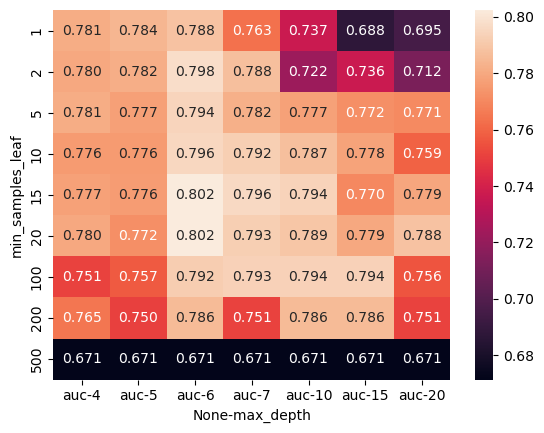

In [231]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

##### Insight max_depth = [6,10, 15, 20] at min_samples_leaf = [15,20] perform well so we choose max_depth=6 and min_samples=20 

In [232]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

### Ensemble Learning and RandomForest
##### Is a group of Decision Trees
##### Random forest is made up of decision tree subsets with combiation of random features
##### Average prediciton output of the decision trees will be taken

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [250]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10)

In [253]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.7985729119024958

###### Tuning n_estimators parameter 

In [263]:
scores=[]
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n,auc))

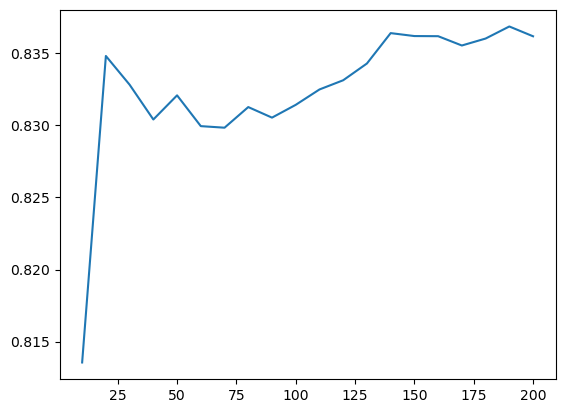

In [264]:
df_scores = pd.DataFrame(scores, columns=['n_estimators','auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

In [ ]:
n=180

In [265]:
scores = []

for d in [5, 10, 15]:
    for t in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=t,max_depth=d, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,t,auc))

In [268]:
df_scores = pd.DataFrame(scores, columns=['max_depth','n_estimators','auc'])
df_scores.sort_values(by='auc',ascending=False).head()

,max_depth,n_estimators,auc
28,10,90,0.842989
35,10,160,0.842810
27,10,80,0.842798
34,10,150,0.842464
36,10,170,0.842446


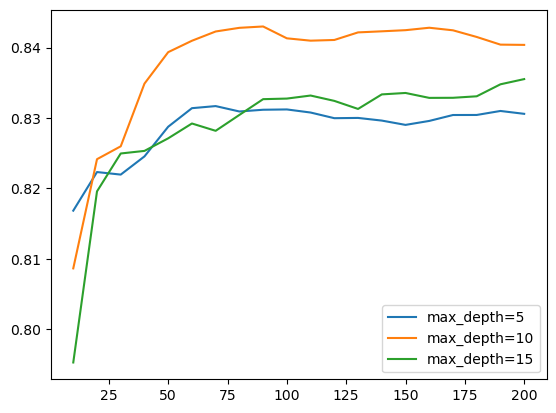

In [272]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators,df_subset.auc, label='max_depth=%d' %d)

plt.legend()

###### max_depth = 10 returns the best auc

In [274]:
max_depth = 10

In [283]:
scores = []
for m in [1, 3, 5, 10, 50]:
    for n in [10, 201, 10]:
        rf = RandomForestClassifier(
            n_estimators=n,
            min_samples_leaf=m,
            max_depth=max_depth,
            random_state=1
        )
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((m,n,auc))
        

In [284]:
columns = ['min_samples_leaf','n_estimators', 'auc']
df_scores = pd.DataFrame(scores,columns=columns)
df_scores.sort_values(by='auc',ascending=False).head()

,min_samples_leaf,n_estimators,auc
7,5,201,0.842526
4,3,201,0.841444
1,1,201,0.840276
10,10,201,0.840115
9,10,10,0.827056


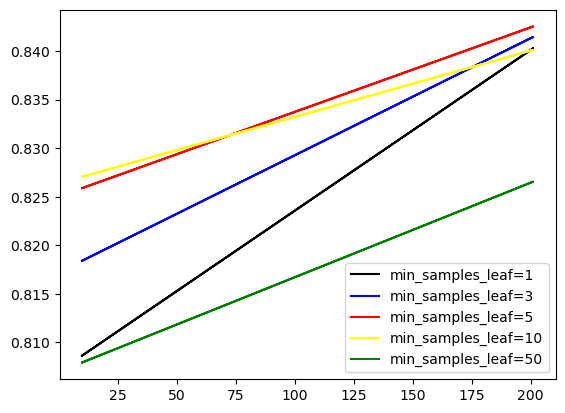

In [286]:
colors = ['black','blue','red', 'yellow', 'green']
leaves = [1, 3, 5, 10, 50]
for s,color in zip(leaves, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    plt.plot(df_subset.n_estimators,df_subset.auc,
             color=color, label='min_samples_leaf=%d' % s)

plt.legend()

###### model functions best at min_samples_leaf=5  

In [288]:
min_samples_leaf=5

In [290]:
#Now train the model with these parameters values
rf = RandomForestClassifier(
    n_estimators=n,
    max_depth=max_depth,
    min_samples_leaf=min_samples_leaf,
    random_state=1,
)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=10,
                       random_state=1)

In [291]:
y_pred = rf.predict_proba(X_val)[:, 1]

In [292]:
auc = roc_auc_score(y_val, y_pred)
auc

0.8258816549030271

### Gradient Boosting and Xgboost
##### used for CART(classification and regression trees)
##### It is an ensemble of weak prediction models

In [295]:
import xgboost as xgb

In [313]:
features = list(dv.get_feature_names_out())

In [314]:
#first step create a DMatrix
dtrain= xgb.DMatrix(X_train, label=y_train, feature_names=features)

In [315]:
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [317]:
# specify xgb_params
xgb_params = {
    'eta': 1.0,
    'max_depth':6,
    'min_child_weight': 1,
    
    'objective':'binary:logistic',
    'nthreads': 8,
    
    'seed':1,
    'verbosity':1
}

model_xgb = xgb.train(xgb_params,dtrain,num_boost_round=200)

In [320]:
# note: xgboost has no predict_proba() method
y_pred = model_xgb.predict(dval)

In [321]:
auc = roc_auc_score(y_val, y_pred)
auc

0.8044567918021237

In [322]:
watchlist = [(dtrain,'train'),(dval,'val')]

In [328]:
%%capture output

#xgb_params a map of parameters
# eta: Step size shrinkage used in update to prevents overfitting
# max_depth: how deep the tree has to grow
# min_child_weight: minimum sum of instance weight (hessian) needed in a child.
# objective: specifies the learning task
# nthreads: maximum number of threads available
# eval_metric: the type of evaluation metric used
# seed: Random number seed. 
# verbosity: Verbosity of printing messages. Valid values are 0 (silent), 1 (warning), 2 (info), 3 (debug).

xgb_params = {
    'eta': 1.0,
    'max_depth':6,
    'min_child_weight': 1,
    
    'objective':'binary:logistic',
    'nthreads': 8,
    'eval_metric': 'auc',
    
    'seed':1,
    'verbosity':1
}
 
# explaining the parameters
# dtrain is the DMatrix form of X_train
# num_boost_round specifies the number of trees to use
# verbose_evals=5 to print out every 5th value
# evals compare the auc_roc_score value of train and validation dataset
model_xgb = xgb.train(xgb_params,
                      dtrain,
                      num_boost_round=200, 
                      verbose_eval=5,
                      evals=watchlist
                     )

In [329]:
s = output.stdout
s.split('\n')
print(s)

[0]	train-auc:0.85926	val-auc:0.80044
[5]	train-auc:0.95748	val-auc:0.78805
[10]	train-auc:0.98777	val-auc:0.78547
[15]	train-auc:0.99536	val-auc:0.78937
[20]	train-auc:0.99852	val-auc:0.79633
[25]	train-auc:0.99950	val-auc:0.79851
[30]	train-auc:0.99997	val-auc:0.79733
[35]	train-auc:1.00000	val-auc:0.80070
[40]	train-auc:1.00000	val-auc:0.80049
[45]	train-auc:1.00000	val-auc:0.80192
[50]	train-auc:1.00000	val-auc:0.80029
[55]	train-auc:1.00000	val-auc:0.80087
[60]	train-auc:1.00000	val-auc:0.80020
[65]	train-auc:1.00000	val-auc:0.80158
[70]	train-auc:1.00000	val-auc:0.80167
[75]	train-auc:1.00000	val-auc:0.80192
[80]	train-auc:1.00000	val-auc:0.80165
[85]	train-auc:1.00000	val-auc:0.80214
[90]	train-auc:1.00000	val-auc:0.80179
[95]	train-auc:1.00000	val-auc:0.80340
[100]	train-auc:1.00000	val-auc:0.80321
[105]	train-auc:1.00000	val-auc:0.80297
[110]	train-auc:1.00000	val-auc:0.80187
[115]	train-auc:1.00000	val-auc:0.80351
[120]	train-auc:1.00000	val-auc:0.80253
[125]	train-auc:1.0000

In [330]:
line = s.split('\n')[0]
num_iter, train_auc, val_auc = line.split('\t')

['[0]', 'train-auc:0.85926', 'val-auc:0.80044']

In [345]:
#function to parse output
def parse_xgb_output(output):
    results = []
    
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')
        
        it = int(str(it_line.split('[[]]')))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it,train, val))
    
    columns = ['num_iters', 'train_auc','val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [346]:
parse_xgb_output(output)

ValueError: invalid literal for int() with base 10: "['[0]']"